# Импортируем нужные библиотеки

In [164]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Загружаем данные

In [165]:
archive_path = "/content/mai-ml-contest-1-2025-1.zip"
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)
try:
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Архив успешно извлечён в {extract_dir}")
except zipfile.BadZipFile:
    print("Ошибка: архив повреждён или не является ZIP-файлом.")
except FileNotFoundError:
    print("Ошибка: архив не найден.")

Архив успешно извлечён в extracted_files


In [44]:
train_df = pd.read_csv("/content/extracted_files/mai-ml-contest-1-2025-1/train.csv")
test_df = pd.read_csv("/content/extracted_files/mai-ml-contest-1-2025-1/test.csv")

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

# Проводим разведочный анализ данных

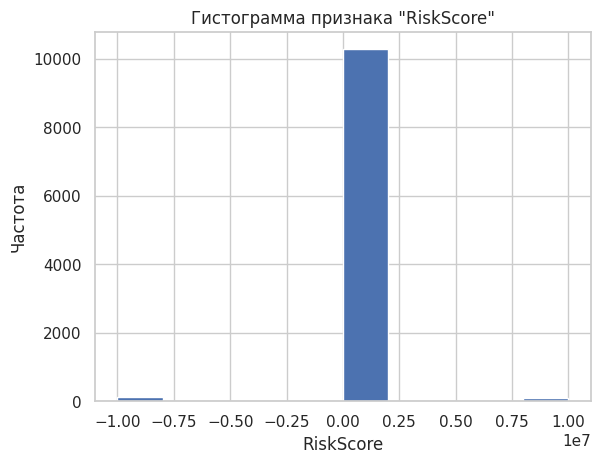

In [47]:
plt.hist(train_df['RiskScore'], bins=10)
plt.title('Гистограмма признака "RiskScore"')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.show()

In [48]:
train_df['RiskScore'].describe()

,RiskScore
count,1.048700e+04
mean,-2.569878e+04
std,1.431675e+06
min,-9.999999e+06
25%,3.256475e+01
50%,4.411876e+01
75%,6.535690e+01
max,1.000000e+07


In [49]:
train_df['RiskScore'].value_counts()

,count
RiskScore,
-9.999999e+06,121
1.000000e+07,94
3.513328e+01,3
6.495533e+01,3
6.485634e+01,3
...,...
4.662566e+01,1
2.813811e+01,1
4.995057e+01,1


In [50]:
train_df = train_df[(train_df['RiskScore'] > -9.999999e+06) & (train_df['RiskScore'] < 1.000000e+07)]

In [51]:
train_df['RiskScore'].value_counts()

,count
RiskScore,
78.011127,3
50.408446,3
77.817044,3
64.856336,3
62.919486,3
...,...
34.488104,1
28.495737,1
66.176500,1


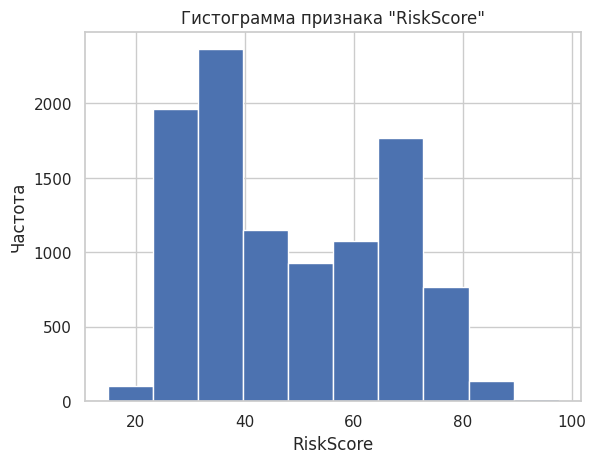

In [52]:
plt.hist(train_df['RiskScore'], bins=10)
plt.title('Гистограмма признака "RiskScore"')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.show()

In [53]:
train_df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

<ipython-input-54-4821d24ed167>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


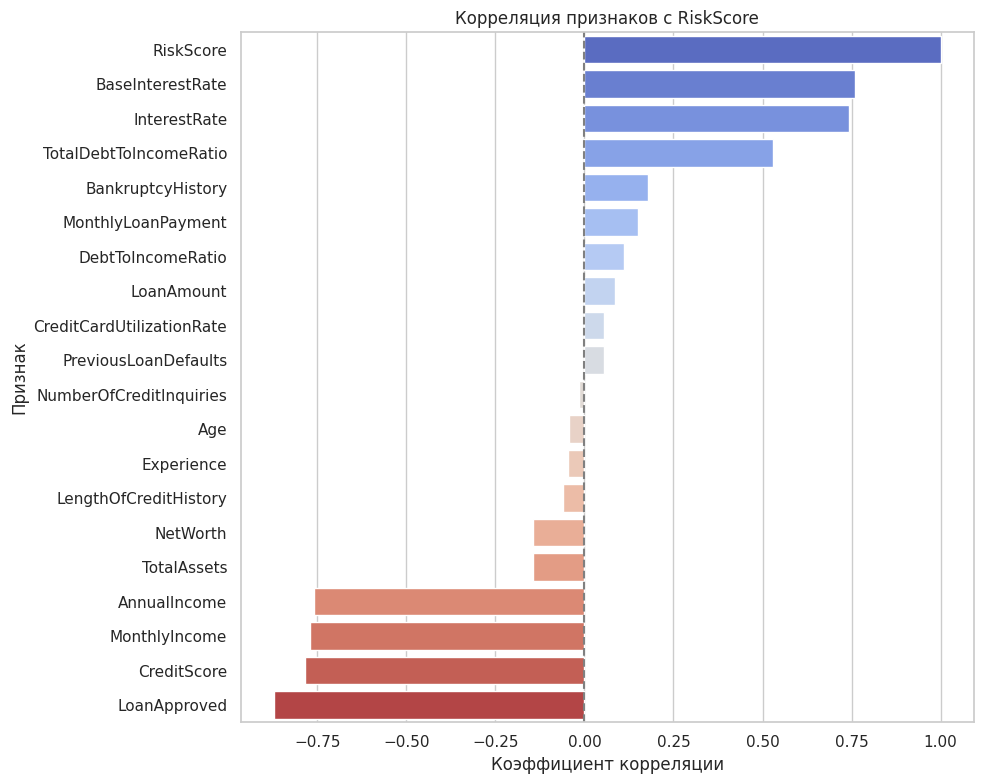

In [54]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = train_df[numeric_cols].corr()
risk_corr = corr_matrix["RiskScore"].sort_values(ascending=False)
top_corr = pd.concat([risk_corr.head(10), risk_corr.tail(10)])
plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Корреляция признаков с RiskScore")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


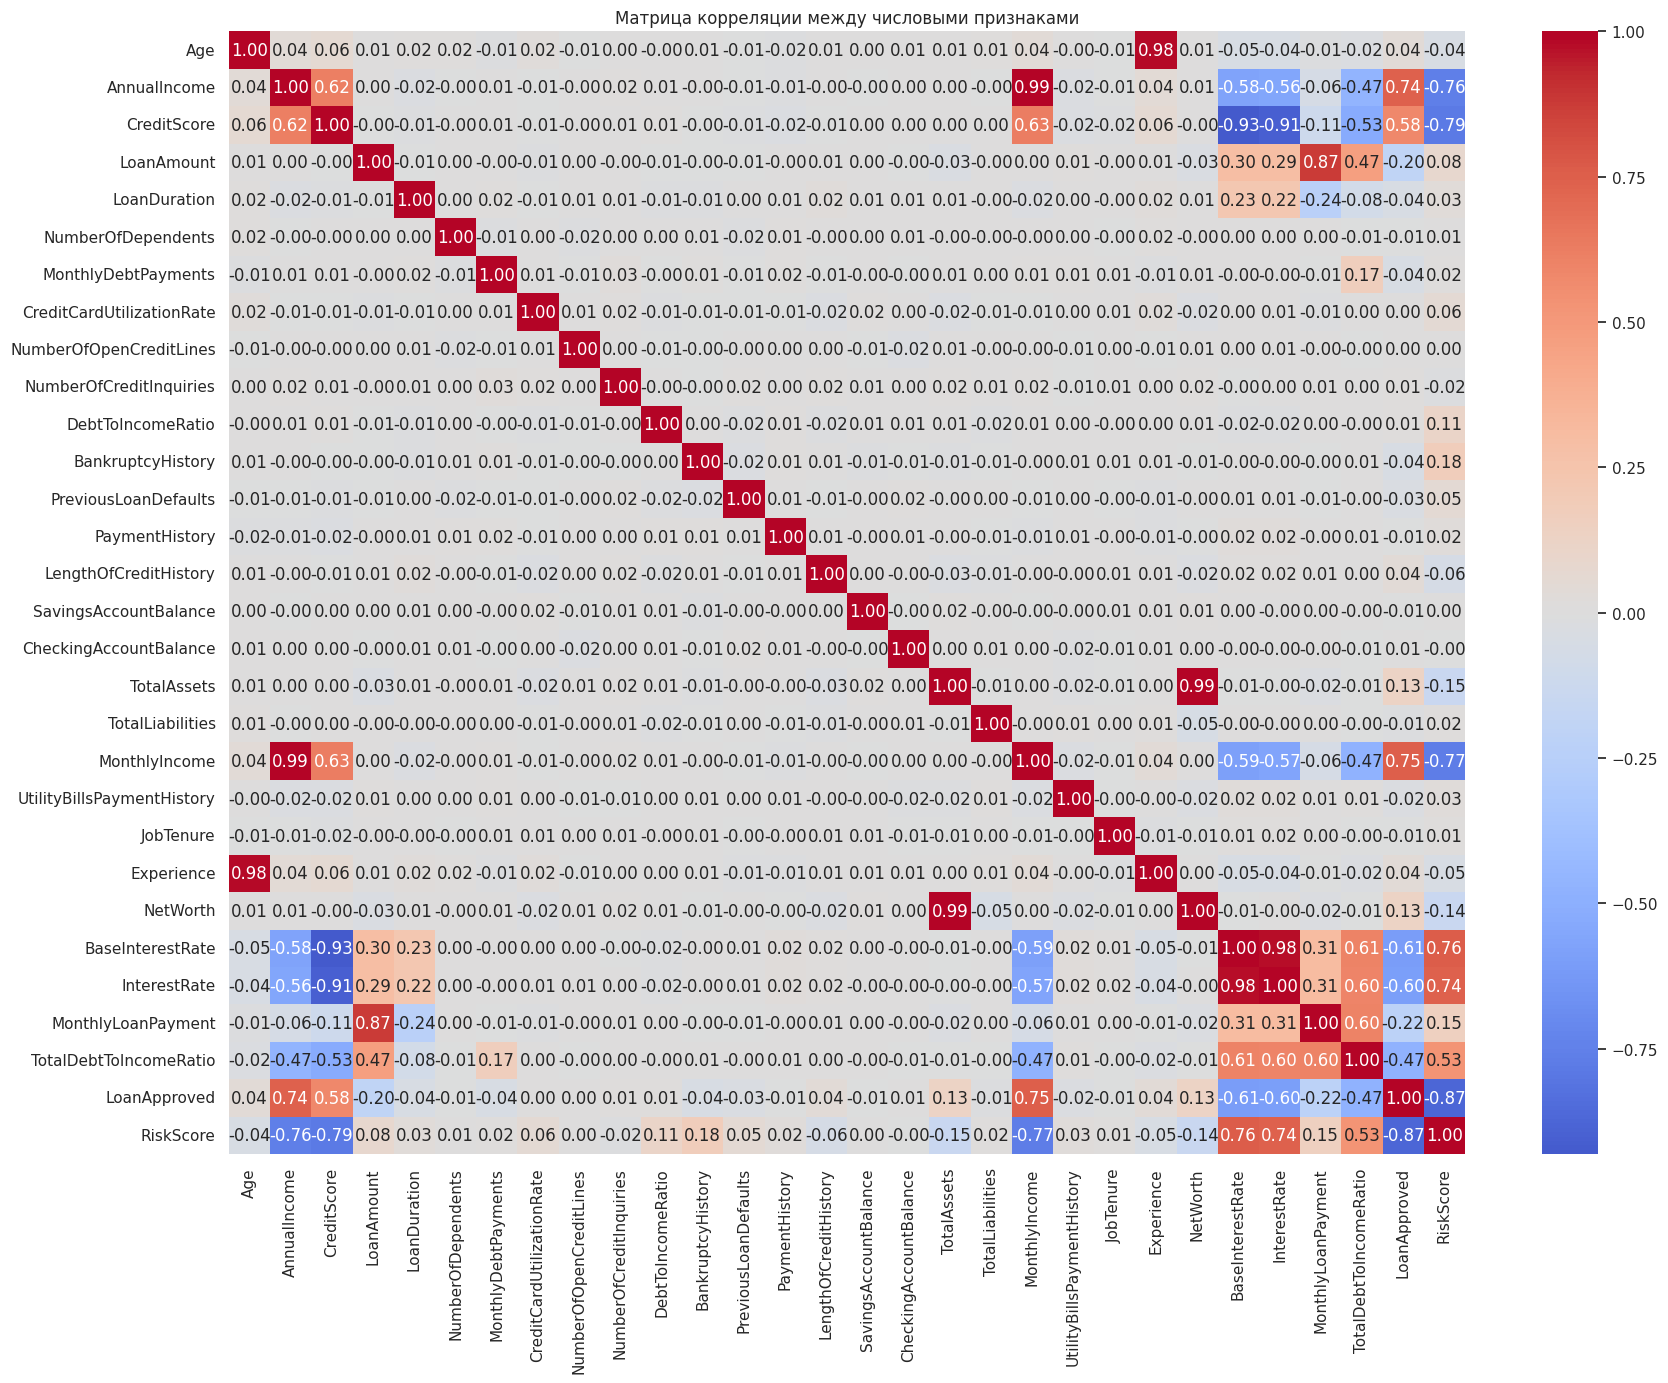

In [55]:
numeric_cols = train_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Матрица корреляции между числовыми признаками")
plt.tight_layout()
plt.show()


## Смотрим на выбросы в признаках при помощи ящика с усами

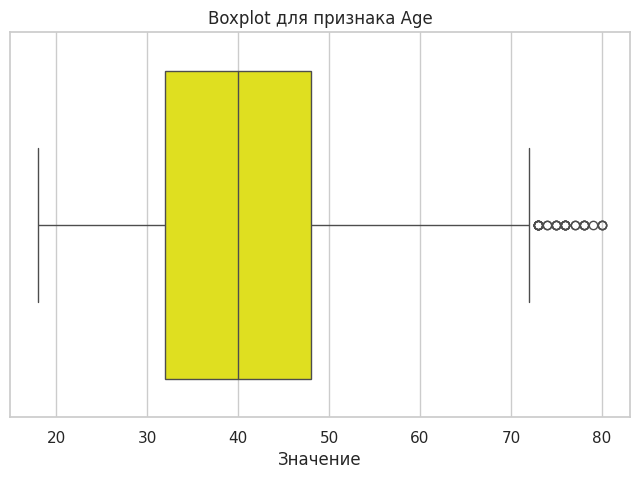

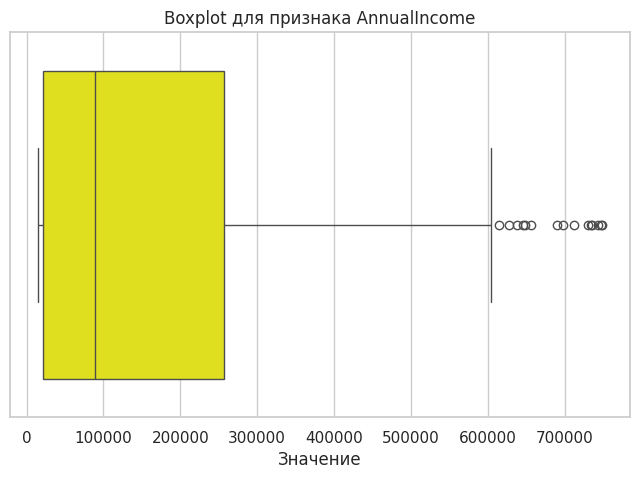

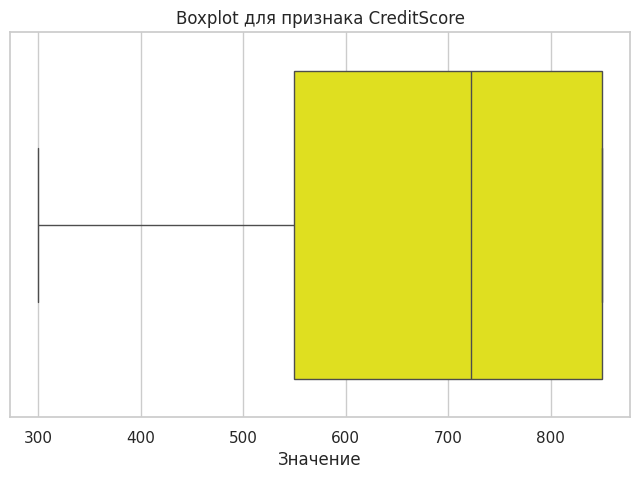

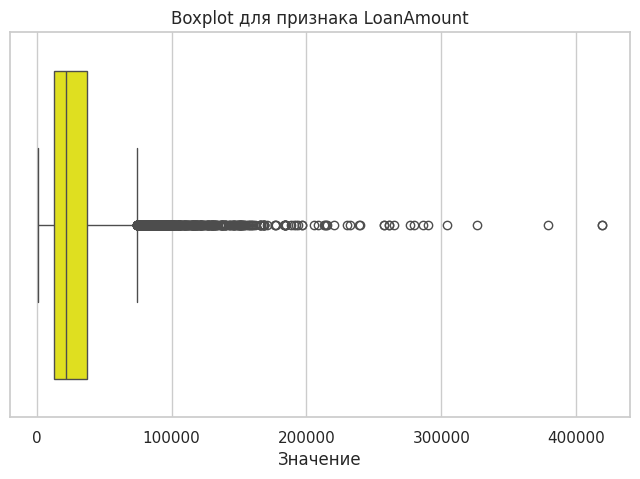

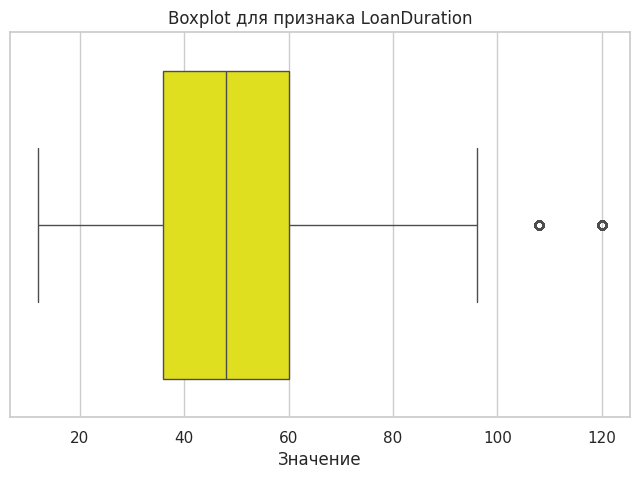

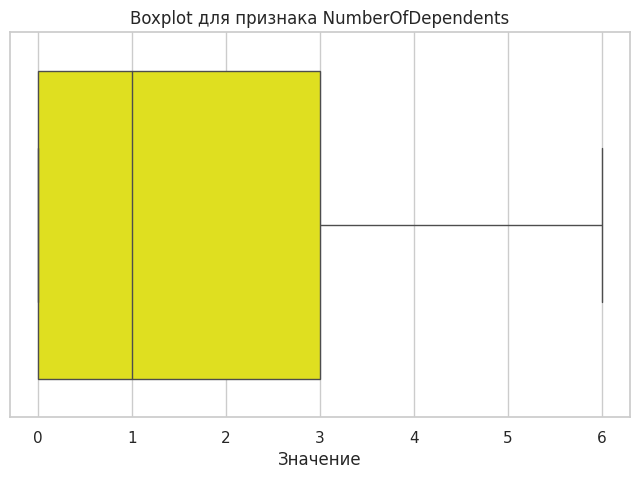

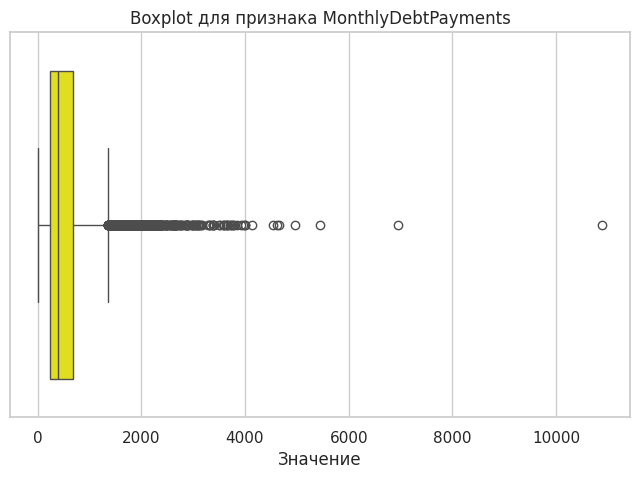

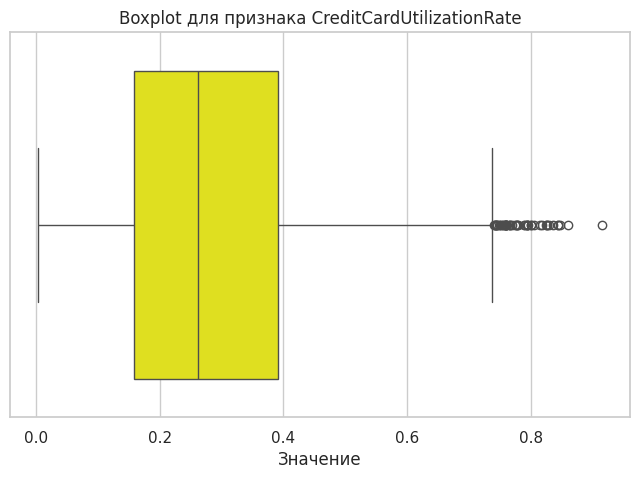

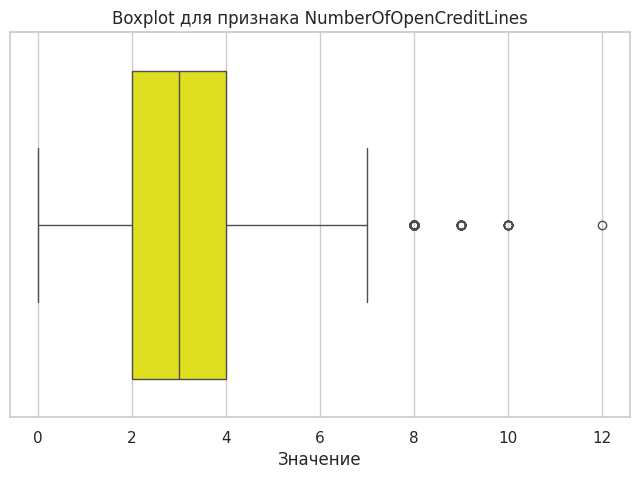

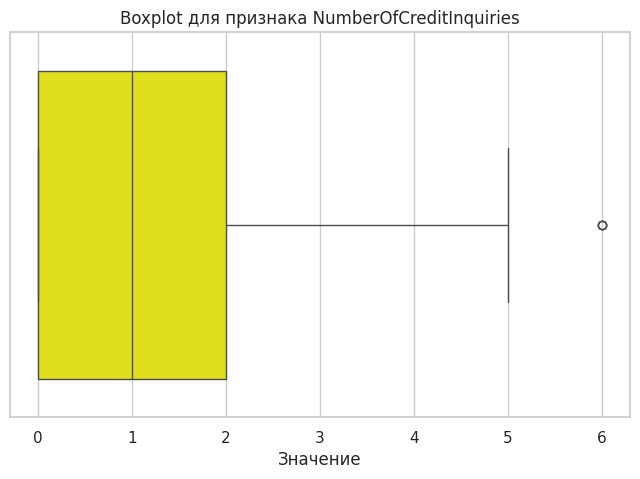

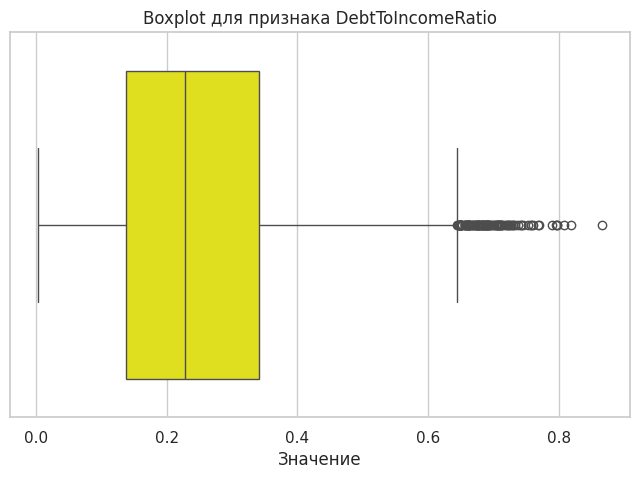

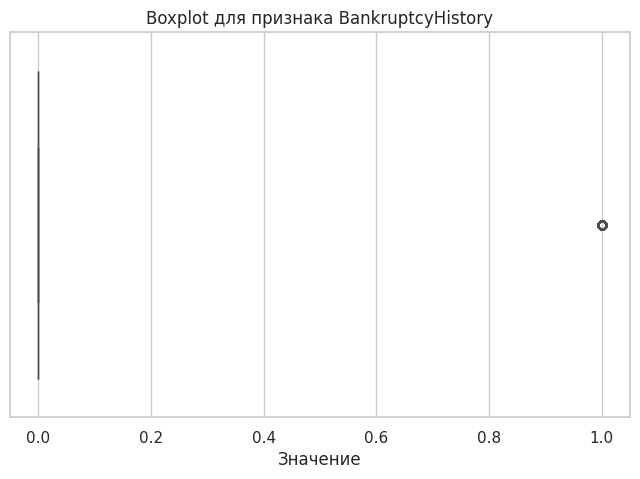

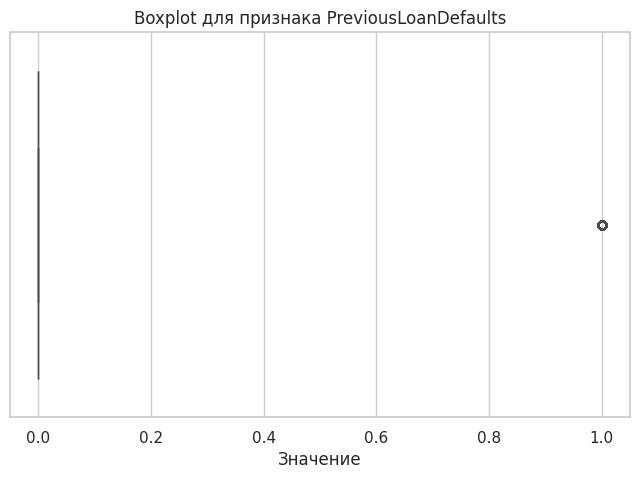

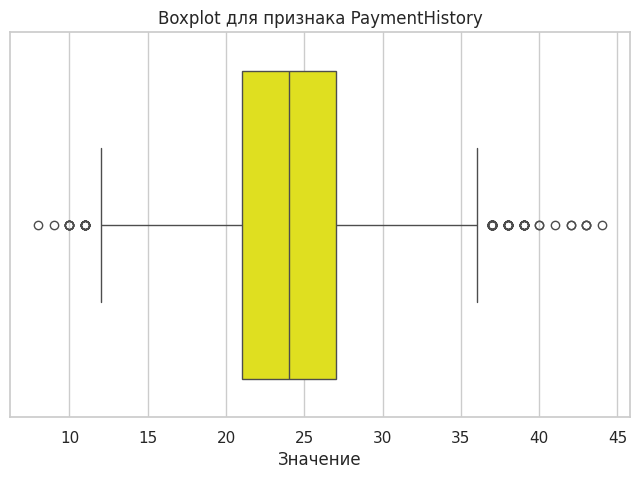

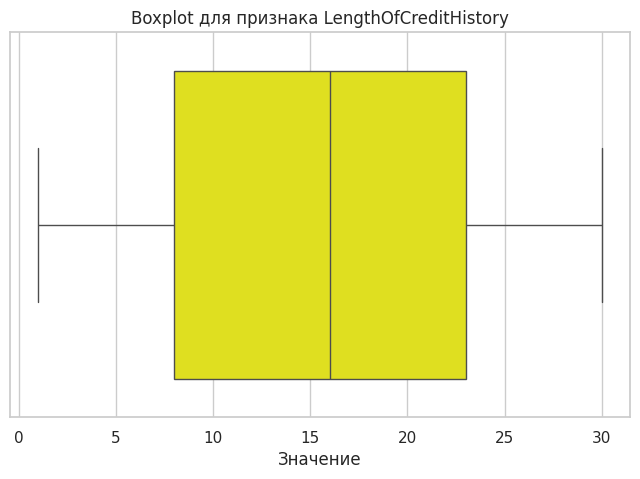

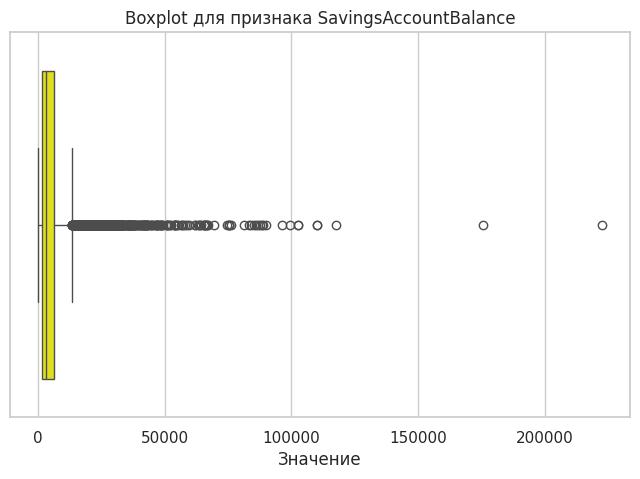

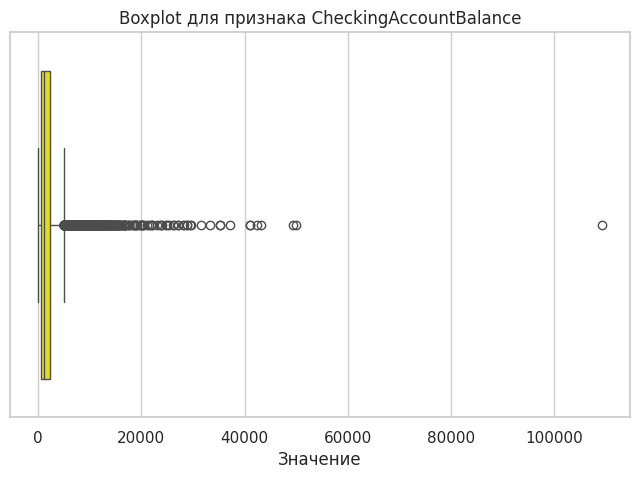

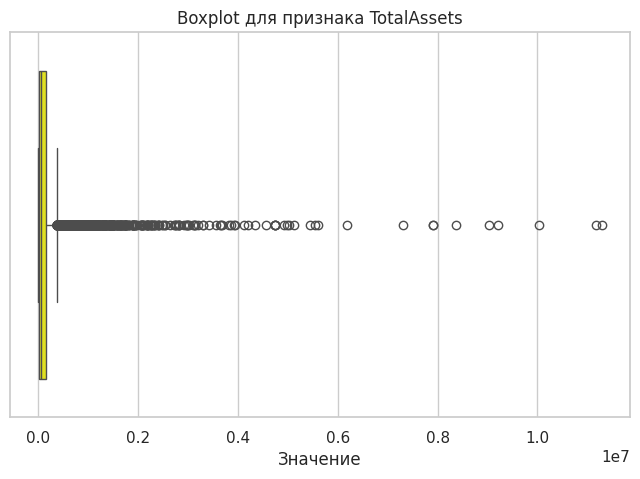

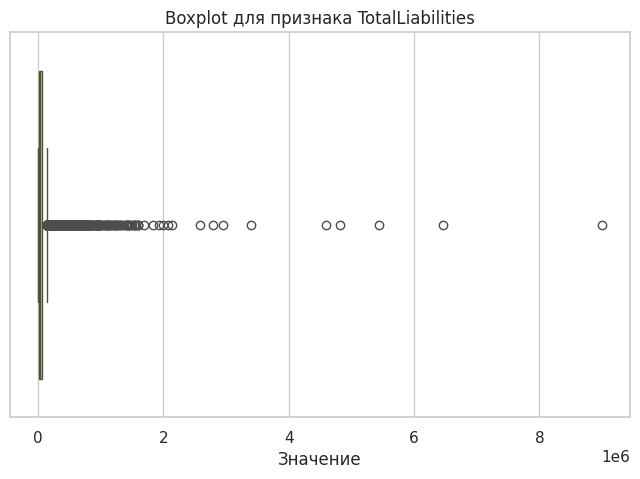

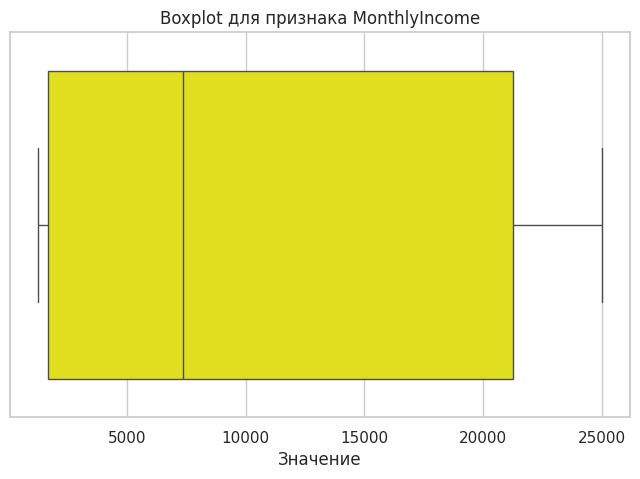

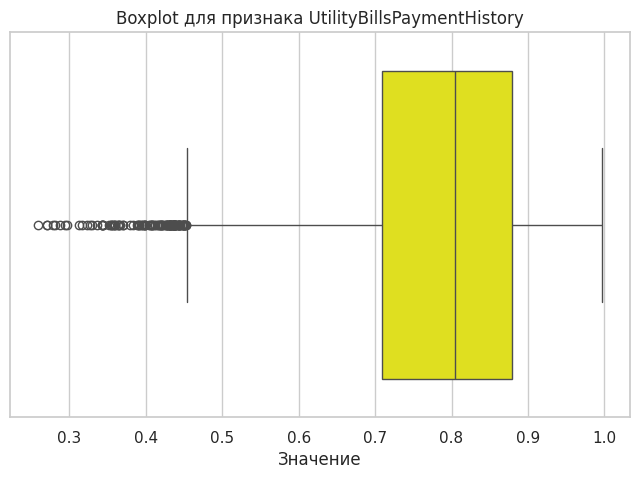

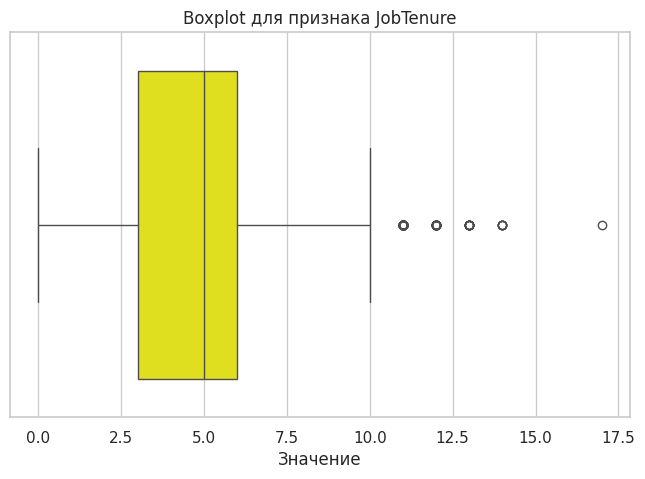

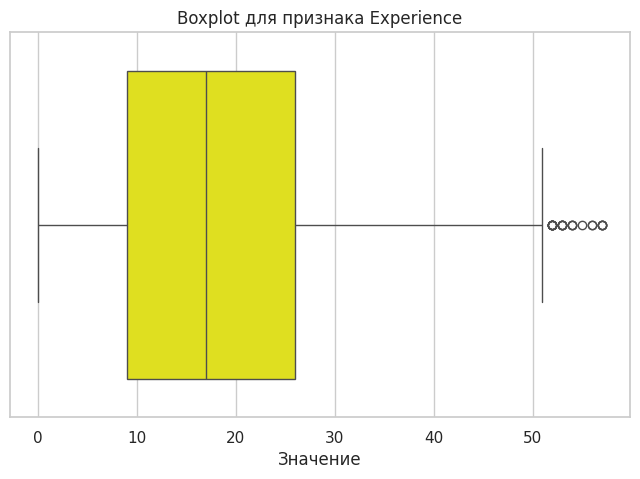

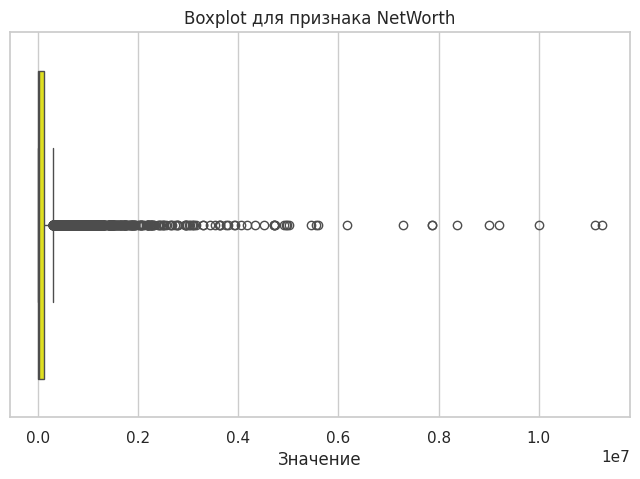

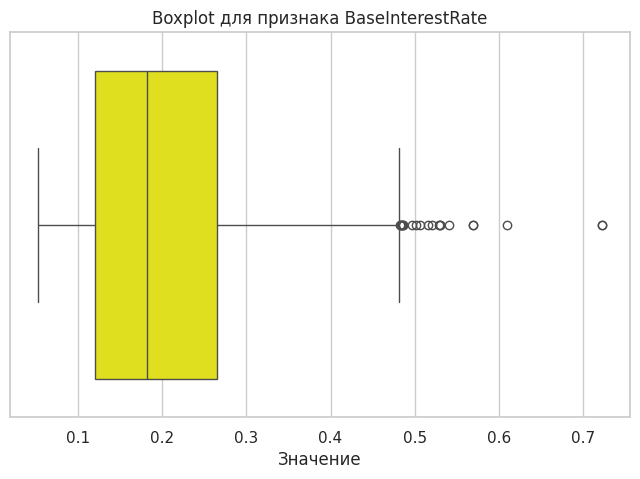

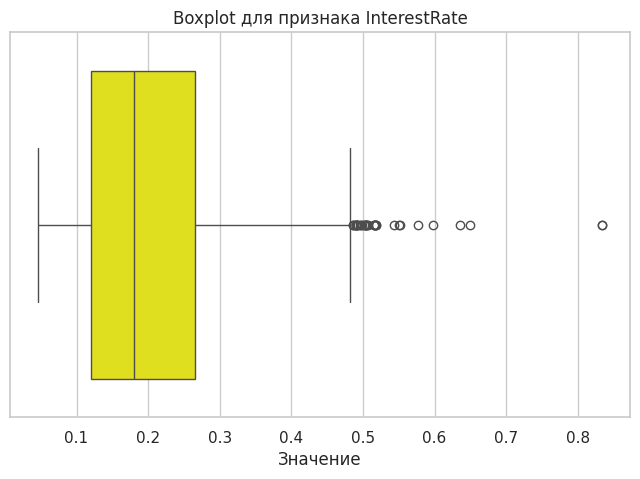

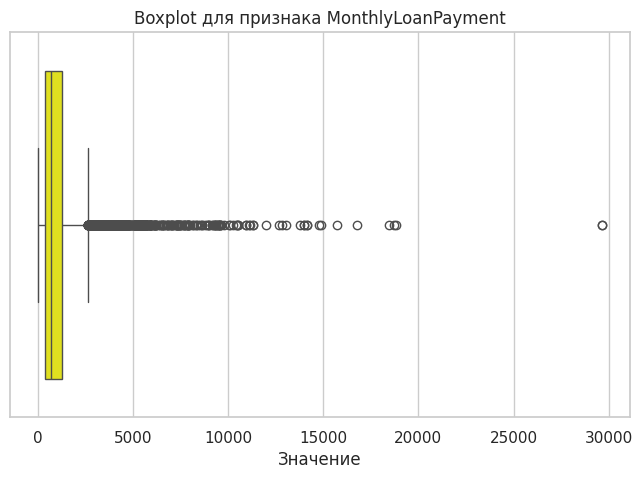

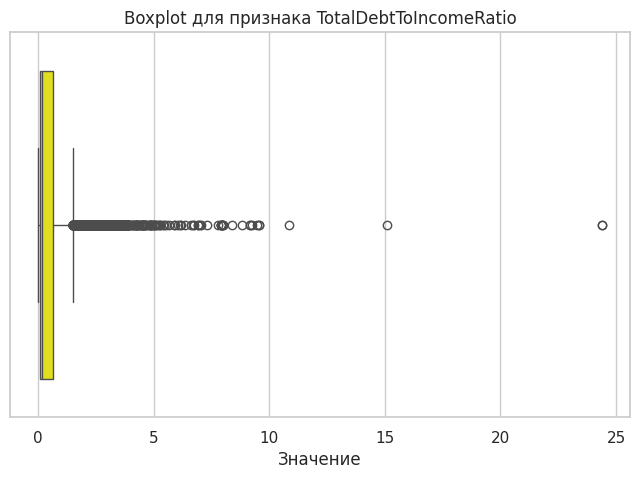

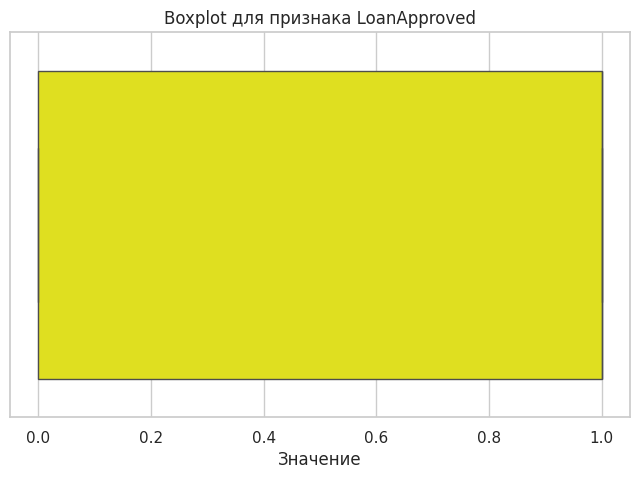

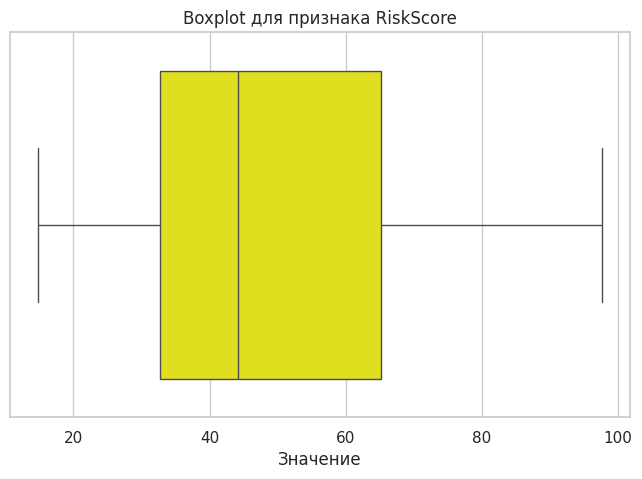

In [56]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
sns.set_theme(style="whitegrid")
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x=col, color='yellow')
    plt.title(f'Boxplot для признака {col}')
    plt.xlabel('Значение')
    plt.show()


удаляем сильные выбросы

In [57]:
train_df = train_df[train_df["AnnualIncome"] <= 600000]
train_df = train_df[train_df["LoanDuration"] <= 100]
train_df = train_df[train_df["MonthlyDebtPayments"] <= 4500]
train_df = train_df[train_df["NumberOfOpenCreditLines"] <= 7]
train_df = train_df[train_df["NumberOfCreditInquiries"] <= 5]
train_df = train_df[train_df["DebtToIncomeRatio"] <= 0.8]
train_df = train_df[(train_df["PaymentHistory"] < 40) & (train_df["PaymentHistory"] > 10)]
train_df = train_df[train_df["SavingsAccountBalance"] <= 100000]
train_df = train_df[train_df["CheckingAccountBalance"] <= 40000]
train_df = train_df[train_df["TotalAssets"] <= 0.6e+07]
train_df = train_df[train_df["TotalLiabilities"] <= 3.0e+07]
train_df = train_df[train_df["UtilityBillsPaymentHistory"] > 0.3]
train_df = train_df[train_df["NetWorth"] <= 0.6e+07]
train_df = train_df[train_df["BaseInterestRate"] <= 0.55]
train_df = train_df[train_df["InterestRate"] <= 0.55]
train_df = train_df[train_df["MonthlyLoanPayment"] <= 15000]
train_df = train_df[train_df["TotalDebtToIncomeRatio"] <= 10]


добавляем новые признаки

In [58]:
train_df['feature_1'] = train_df['MonthlyLoanPayment'] / train_df['LoanAmount']
train_df['feature_2'] = train_df['InterestRate'] / train_df['CreditScore']
train_df['feature_3'] = train_df['MonthlyLoanPayment'] / train_df['LoanAmount']
train_df['feature_4'] = train_df['TotalAssets'] / train_df['NetWorth']

In [59]:
train_df.shape

(9089, 40)

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9089 entries, 0 to 11014
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9089 non-null   object 
 1   Age                         9089 non-null   float64
 2   AnnualIncome                9089 non-null   float64
 3   CreditScore                 9089 non-null   float64
 4   LoanAmount                  9089 non-null   float64
 5   LoanDuration                9089 non-null   float64
 6   MaritalStatus               9089 non-null   object 
 7   NumberOfDependents          9089 non-null   float64
 8   HomeOwnershipStatus         9089 non-null   object 
 9   MonthlyDebtPayments         9089 non-null   float64
 10  CreditCardUtilizationRate   9089 non-null   float64
 11  NumberOfOpenCreditLines     9089 non-null   float64
 12  NumberOfCreditInquiries     9089 non-null   float64
 13  DebtToIncomeRatio           9089 non-

In [61]:
clean_train_df = train_df

## Добавим возрастные страты и заменим модой по стратам

In [62]:
clean_train_df["LoanPurpose"].value_counts()

,count
LoanPurpose,
Home,2709
Debt Consolidation,2231
Auto,1828
Education,1480
Other,841


In [63]:
clean_train_df["LoanPurpose"].describe()

,LoanPurpose
count,9089
unique,5
top,Home
freq,2709


In [64]:
clean_train_df[clean_train_df.index == 13]["LoanPurpose"]

,LoanPurpose


In [65]:
clean_train_df["Age"].describe()

,Age
count,9089.000000
mean,39.909781
std,11.598846
min,18.000000
25%,32.000000
50%,40.000000
75%,48.000000
max,80.000000


In [66]:
bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']

clean_train_df['AgeGroup'] = pd.cut(clean_train_df['Age'], bins=bins, labels=labels, right=False)

In [67]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9089 entries, 0 to 11014
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ApplicationDate             9089 non-null   object  
 1   Age                         9089 non-null   float64 
 2   AnnualIncome                9089 non-null   float64 
 3   CreditScore                 9089 non-null   float64 
 4   LoanAmount                  9089 non-null   float64 
 5   LoanDuration                9089 non-null   float64 
 6   MaritalStatus               9089 non-null   object  
 7   NumberOfDependents          9089 non-null   float64 
 8   HomeOwnershipStatus         9089 non-null   object  
 9   MonthlyDebtPayments         9089 non-null   float64 
 10  CreditCardUtilizationRate   9089 non-null   float64 
 11  NumberOfOpenCreditLines     9089 non-null   float64 
 12  NumberOfCreditInquiries     9089 non-null   float64 
 13  DebtToIncomeRatio     

In [68]:
clean_train_df['LoanPurpose'] = clean_train_df.groupby('AgeGroup', observed=True)['LoanPurpose'].transform(lambda x: x.fillna(x.mode()[0]))

In [69]:
clean_train_df[clean_train_df.index == 13]["LoanPurpose"]

,LoanPurpose


In [70]:
clean_train_df["LoanPurpose"].describe()

,LoanPurpose
count,9089
unique,5
top,Home
freq,2709


In [71]:
clean_train_df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,feature_1,feature_2,feature_3,feature_4,AgeGroup
11006,1994-07-25,32.0,300000.0,850.0,15942.0,60.0,Married,1.0,Mortgage,457.0,...,0.103314,341.325615,0.031933,1.0,29.363464,0.021410,0.000122,0.021410,1.261044,31-45
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,0.108596,146.407421,0.016896,1.0,28.051757,0.018962,0.000128,0.018962,3.454775,31-45
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,0.106387,378.792448,0.039952,1.0,32.440586,0.025670,0.000125,0.025670,1.004065,46-60
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,0.401087,1793.042130,1.991234,0.0,67.673170,0.034911,0.001337,0.034911,1.014956,18-30
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,0.360670,1047.672294,1.168538,0.0,75.292707,0.034099,0.001194,0.034099,1.014455,18-30


## Сделаем OHE для категориальных признаков


In [72]:
categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel", "AgeGroup"]
for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(clean_train_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=clean_train_df.index)
    clean_train_df = pd.concat([clean_train_df.drop(columns=[categorical_column]), encoded_df], axis=1)


In [73]:
clean_train_df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,AgeGroup_18-30,AgeGroup_31-45,AgeGroup_46-60,AgeGroup_61+
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,1994-07-25,32.0,300000.0,850.0,15942.0,60.0,1.0,457.0,0.210743,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Добавим новые признаки из ApplicationDate

In [74]:
clean_train_df["ApplicationDate"] = pd.to_datetime(clean_train_df["ApplicationDate"])
clean_train_df['ApplicationYear'] = clean_train_df['ApplicationDate'].dt.year
clean_train_df['ApplicationMonth'] = clean_train_df['ApplicationDate'].dt.month
clean_train_df['ApplicationDay'] = clean_train_df['ApplicationDate'].dt.day
clean_train_df['ApplicationDayOfWeek'] = clean_train_df['ApplicationDate'].dt.dayofweek
clean_train_df['ApplicationDayOfYear'] = clean_train_df['ApplicationDate'].dt.dayofyear
clean_train_df['ApplicationWeekOfYear'] = clean_train_df['ApplicationDate'].dt.isocalendar().week
clean_train_df['ApplicationQuarter'] = clean_train_df['ApplicationDate'].dt.quarter
clean_train_df['ApplicationIsWeekend'] = clean_train_df['ApplicationDayOfWeek'].isin([5, 6]).astype(int)


# Подготовим тестовые данные

In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

In [76]:
test_df["ApplicationDate"] = pd.to_datetime(test_df["ApplicationDate"])

test_df['ApplicationYear'] = test_df['ApplicationDate'].dt.year
test_df['ApplicationMonth'] = test_df['ApplicationDate'].dt.month
test_df['ApplicationDay'] = test_df['ApplicationDate'].dt.day
test_df['ApplicationDayOfWeek'] = test_df['ApplicationDate'].dt.dayofweek
test_df['ApplicationDayOfYear'] = test_df['ApplicationDate'].dt.dayofyear
test_df['ApplicationWeekOfYear'] = test_df['ApplicationDate'].dt.isocalendar().week
test_df['ApplicationQuarter'] = test_df['ApplicationDate'].dt.quarter
test_df['ApplicationIsWeekend'] = test_df['ApplicationDayOfWeek'].isin([5, 6]).astype(int)

bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel", "AgeGroup"]

for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(test_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=test_df.index)
    test_df = pd.concat([test_df, encoded_df], axis=1)
test_df = test_df.drop(columns = categorical_columns)

In [157]:
test_df['feature_1'] = test_df['MonthlyLoanPayment'] / test_df['LoanAmount']
test_df['feature_2'] = test_df['InterestRate'] / test_df['CreditScore']
test_df['feature_3'] = test_df['MonthlyLoanPayment'] / test_df['LoanAmount']
test_df['feature_4'] = test_df['TotalAssets'] / test_df['NetWorth']

# Прикручиваем модель

In [87]:
class BaseLinearRegression:
    def __init__(self):
        self.weights = None

    def add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def predict(self, X):
        X = self.add_bias(X)
        return X @ self.weights


class AnalyticLinearRegression(BaseLinearRegression):
    def fit(self, X, y):
        X = self.add_bias(X)
        y = y.reshape(-1, 1)
        self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y


class GradientLinearRegression(BaseLinearRegression):
    def __init__(self, lr=0.01, epochs=1000):
        super().__init__()
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = self.add_bias(X)
        y = y.reshape(-1, 1)
        m = X.shape[0]
        self.weights = np.zeros((X.shape[1], 1))

        for _ in range(self.epochs):
            y_pred = X @ self.weights
            gradient = (1 / m) * (X.T @ (y_pred - y))
            gradient = np.clip(gradient, -1e3, 1e3)
            self.weights -= self.lr * gradient
            if np.isnan(self.weights).any():
                raise ValueError("NaN в весах SGD")


class StochasticLinearRegression(BaseLinearRegression):
    def __init__(self, lr=0.01, epochs=1000, batch_size=1):
        super().__init__()
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        X = self.add_bias(X)
        y = y.reshape(-1, 1)
        m = X.shape[0]
        self.weights = np.zeros((X.shape[1], 1))

        for _ in range(self.epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]
                y_pred = X_batch @ self.weights
                gradient = (1 / self.batch_size) * (X_batch.T @ (y_pred - y_batch))
                gradient = np.clip(gradient, -1e3, 1e3)
                self.weights -= self.lr * gradient
                if np.isnan(self.weights).any():
                    raise ValueError("NaN в весах SGD")

In [88]:
X = clean_train_df.drop(columns=['RiskScore', 'ApplicationDate'])
y = clean_train_df['RiskScore']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values
y_test = y_test.values

scalers = {
    "none": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler()
}
model_classes = {
    "analytic": AnalyticLinearRegression,
    "gd": GradientLinearRegression,
    "sgd": StochasticLinearRegression
}
lr_table = {
    "none": 0.0001,
    "standard": 0.1,
    "minmax": 0.1
}
results = {}

In [90]:
for scaler_name, scaler in scalers.items():
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    if scaler:
      scaler.fit(X_train)
      X_train_scaled = scaler.transform(X_train)
      X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.asarray(X_train_scaled, dtype=np.float64)
    X_test_scaled = np.asarray(X_test_scaled, dtype=np.float64)
    y_train = np.asarray(y_train, dtype=np.float64)
    y_test = np.asarray(y_test, dtype=np.float64)
    sk_model = LinearRegression()
    sk_model.fit(X_train_scaled, y_train)
    sk_preds = sk_model.predict(X_test_scaled)
    sk_mse = mean_squared_error(y_test, sk_preds)
    sk_weights = np.append(sk_model.intercept_, sk_model.coef_).flatten()
    results[(scaler_name, "sklearn")] = {
        "weights": sk_weights,
        "mse": sk_mse
    }
    for name, cls in model_classes.items():
        if name == "sgd":
            model = cls(lr=lr_table[scaler_name], epochs=1000, batch_size=1)
        elif name == "gd":
            model = cls(lr=lr_table[scaler_name], epochs=1000)
        else:
            model = cls()
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled).flatten()
        mse = mean_squared_error(y_test, preds)

        results[(scaler_name, name)] = {
            "mse": mse
        }

In [91]:
for scaler_name in scalers:
    print(f"Scaler: {scaler_name.upper()}")
    for method in ["sklearn", "analytic", "gd", "sgd"]:
        res = results[(scaler_name, method)]
        print(f"  Method: {method:<8} | MSE: {res['mse']:.4f}")
    print()

Scaler: NONE
  Method: sklearn  | MSE: 16.4945
  Method: analytic | MSE: 18.8526
  Method: gd       | MSE: 387335.5705
  Method: sgd      | MSE: 11100280282.5385

Scaler: STANDARD
  Method: sklearn  | MSE: 16.4945
  Method: analytic | MSE: 16.4945
  Method: gd       | MSE: 16.5175
  Method: sgd      | MSE: 14798831.9369

Scaler: MINMAX
  Method: sklearn  | MSE: 16.4945
  Method: analytic | MSE: 16.4945
  Method: gd       | MSE: 21.7422
  Method: sgd      | MSE: 143.4911



## Своя реализация нормализации данных

In [162]:
def z_score_normalization(df):
    df_normalized = df.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            mean = df_normalized[column].mean()
            std = df_normalized[column].std()
            if std != 0:
                df_normalized[column] = (df_normalized[column] - mean) / std
            else:
                df_normalized[column] = 0
    return df_normalized

In [163]:
def min_max_normalization(df):

    df_normalized = df.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            min_val = df_normalized[column].min()
            max_val = df_normalized[column].max()
            if max_val != min_val:
                df_normalized[column] = (df_normalized[column] - min_val) / (max_val - min_val)
            else:
                df_normalized[column] = 0.5
    return df_normalized

Проверка и сравнение

In [100]:
X_train_scaled, X_test_scaled = z_score_normalization(X_train), z_score_normalization(X_test)

In [101]:
X_train_scaled = np.asarray(X_train_scaled, dtype=np.float64)
X_test_scaled = np.asarray(X_test_scaled, dtype=np.float64)
y_train = np.asarray(y_train, dtype=np.float64)
y_test = np.asarray(y_test, dtype=np.float64)
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)
sk_preds = sk_model.predict(X_test_scaled)
sk_mse = mean_squared_error(y_test, sk_preds)
sk_weights = np.append(sk_model.intercept_, sk_model.coef_).flatten()
results[(scaler_name, "sklearn")] = {
        "weights": sk_weights,
        "mse": sk_mse
    }
for name, cls in model_classes.items():
    if name == "sgd":
        model = cls(lr=lr_table[scaler_name], epochs=1000, batch_size=1)
    elif name == "gd":
        model = cls(lr=lr_table[scaler_name], epochs=1000)
    else:
        model = cls()
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, preds)

    results[(scaler_name, name)] = {
            "mse": mse
        }

In [103]:
print("Z-score")
for method in ["sklearn", "analytic", "gd", "sgd"]:
    res = results[(scaler_name, method)]
    print(f"  Method: {method:<8} | MSE: {res['mse']:.4f}")

Z-score
  Method: sklearn  | MSE: 17.3060
  Method: analytic | MSE: 17.3060
  Method: gd       | MSE: 17.3118
  Method: sgd      | MSE: 30100508.0424


In [106]:
X_train_scaled, X_test_scaled = min_max_normalization(X_train), min_max_normalization(X_test)

In [107]:
X_train_scaled = np.asarray(X_train_scaled, dtype=np.float64)
X_test_scaled = np.asarray(X_test_scaled, dtype=np.float64)
y_train = np.asarray(y_train, dtype=np.float64)
y_test = np.asarray(y_test, dtype=np.float64)
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)
sk_preds = sk_model.predict(X_test_scaled)
sk_mse = mean_squared_error(y_test, sk_preds)
sk_weights = np.append(sk_model.intercept_, sk_model.coef_).flatten()
results[(scaler_name, "sklearn")] = {
        "weights": sk_weights,
        "mse": sk_mse
    }
for name, cls in model_classes.items():
    if name == "sgd":
        model = cls(lr=lr_table[scaler_name], epochs=1000, batch_size=1)
    elif name == "gd":
        model = cls(lr=lr_table[scaler_name], epochs=1000)
    else:
        model = cls()
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, preds)

    results[(scaler_name, name)] = {
            "mse": mse
        }

In [108]:
print("MinMax")
for method in ["sklearn", "analytic", "gd", "sgd"]:
    res = results[(scaler_name, method)]
    print(f"  Method: {method:<8} | MSE: {res['mse']:.4f}")

MinMax
  Method: sklearn  | MSE: 16.7311
  Method: analytic | MSE: 16.7714
  Method: gd       | MSE: 21.6430
  Method: sgd      | MSE: 44.1075


## Реализация K-fold CV и LOOCV

In [122]:
def k_fold_cv(X, y, k=5, shuffle_data=True):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    if shuffle_data:
        indices = shuffle(indices, random_state=42)
    fold_sizes = (n_samples // k) * np.ones(k, dtype=int)
    fold_sizes[:n_samples % k] += 1
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        yield train_indices, test_indices
        current = stop

In [112]:
def loocv(X):
    n_samples = len(X)
    for i in range(n_samples):
        train_indices = np.array([j for j in range(n_samples) if j != i])
        test_indices = np.array([i])
        yield train_indices, test_indices

In [113]:
model = LinearRegression()

In [124]:
X = clean_train_df.drop(columns=['RiskScore', 'ApplicationDate'])
y = clean_train_df['RiskScore']
X = X.reset_index(drop=True).values
y = y.reset_index(drop=True).values

In [130]:
k = 5
mse_scores = []
for train_idx, test_idx in k_fold_cv(X, y, k=k):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
print(f"Avg MSE: {np.mean(mse_scores):.2f}")
print("MSEs:", [round(mse, 2) for mse in mse_scores])

Avg MSE: 16.53
MSEs: [16.49, 17.26, 15.31, 17.15, 16.42]


In [129]:
loo_mse_scores = []
for train_idx, test_idx in tqdm(loocv(X), total=len(X), desc="LOOCV Progress"):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    loo_mse_scores.append(mse)
print(f"Avg MSE: {np.mean(loo_mse_scores):.2f}")

LOOCV Progress: 100%|██████████| 9089/9089 [21:09<00:00,  7.16it/s]

Avg MSE: 16.47


## Пишем свои метрики и сравниваем

In [132]:
def mse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    assert len(y_true) == len(y_pred)
    return np.mean((y_true - y_pred) ** 2)

In [133]:
def mae(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    assert len(y_true) == len(y_pred)
    return np.mean(np.abs(y_true - y_pred))

In [134]:
def r2(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    assert len(y_true) == len(y_pred)
    mean_actual = np.mean(y_true)
    ss_total = np.sum((y_true - mean_actual) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    if ss_total == 0:
        return 0.0
    return 1 - (ss_residual / ss_total)

In [135]:
def mape(y_true, y_pred, epsilon=1e-10):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    assert len(y_true) == len(y_pred)
    y_true_non_zero = np.where(y_true == 0, epsilon, y_true)
    percentage_errors = np.abs((y_true - y_pred) / y_true_non_zero)
    return np.mean(percentage_errors) * 100

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]
}

elastic_net = ElasticNet(max_iter=5000, random_state=42)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 1.0}


In [153]:
  print("-------------------Свои метрики")
  print("MSE:", mse(y_test, y_pred))
  print("MAE:", mae(y_test, y_pred))
  print("R²:", r2(y_test, y_pred))
  print("MAPE:", mape(y_test, y_pred), "%")
  print("-------------------Метрики из Sklearn")
  print("MSE:", mean_squared_error(y_test, y_pred))
  print("MAE:", mean_absolute_error(y_test, y_pred))
  print("R²:", r2_score(y_test, y_pred))
  print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

-------------------Свои метрики
MSE: 16.491202022184215
MAE: 3.198128348267445
R²: 0.9447793561390635
MAPE: 7.2191909665855425 %
-------------------Метрики из Sklearn
MSE: 16.491202022184215
MAE: 3.198128348267445
R²: 0.9447793561390635
MAPE: 0.07219190966585542


## Обучаем на всей обучеющей выборке для предсказания на test_df

In [159]:
X = clean_train_df.drop(columns=['RiskScore', 'ApplicationDate'])
y = clean_train_df['RiskScore']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]
}

elastic_net = ElasticNet(max_iter=5000, random_state=42)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 1.0}


In [160]:
X_test_final = test_df.drop(columns=['ApplicationDate'])

In [161]:
common_columns = X.columns.intersection(X_test_final.columns)
X_test_final = X_test_final[common_columns]

X_test_scaled = scaler.transform(X_test_final)

test_predictions = best_model.predict(X_test_scaled)

submission = pd.DataFrame({'ID': test_df['ID'], 'RiskScore': test_predictions})
submission.to_csv('my_sub.csv', index=False)
